# Fórmulas Importantes no Backpropagation - Parte 1

## Introdução

Neste notebook, exploraremos as fórmulas matemáticas fundamentais que sustentam o algoritmo de Backpropagation. Estas fórmulas são essenciais para entender como o algoritmo calcula os gradientes e atualiza os pesos da rede neural. Nesta primeira parte, focaremos no erro na camada de saída.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display, Math, Latex
import matplotlib.colors as mcolors
from matplotlib import cm
import math
import sympy as sp

## Notação Matemática

Antes de mergulhar nas fórmulas específicas, vamos estabelecer a notação que será usada ao longo deste notebook:

- $w_{ji}^l$ : Peso da conexão entre o neurônio $i$ na camada $l-1$ e o neurônio $j$ na camada $l$
- $b_j^l$ : Viés (bias) do neurônio $j$ na camada $l$
- $z_j^l$ : Soma ponderada das entradas para o neurônio $j$ na camada $l$
- $a_j^l$ : Ativação (saída) do neurônio $j$ na camada $l$
- $\delta_j^l$ : Erro do neurônio $j$ na camada $l$
- $f$ : Função de ativação
- $f'$ : Derivada da função de ativação
- $E$ : Função de erro
- $\eta$ : Taxa de aprendizado

Com esta notação em mente, vamos explorar as fórmulas principais do Backpropagation.

## Erro na Camada de Saída

O cálculo do erro na camada de saída é o ponto de partida para o algoritmo de Backpropagation. Este erro é calculado comparando a saída da rede com o valor desejado (target).

### Função de Erro Quadrático Médio (MSE)

Para uma rede neural com uma única amostra de treinamento, a função de erro quadrático médio é definida como:

$E = \frac{1}{2} \sum_{j} (y_j - a_j^L)^2$

Onde:
- $E$ é o erro total
- $y_j$ é o valor desejado para o neurônio $j$ na camada de saída
- $a_j^L$ é a ativação (saída) do neurônio $j$ na camada de saída $L$
- O fator $\frac{1}{2}$ é uma convenção que simplifica as derivadas subsequentes

### Derivação do Erro na Camada de Saída

O erro $\delta_j^L$ para um neurônio $j$ na camada de saída $L$ é definido como a derivada parcial do erro total em relação à soma ponderada $z_j^L$:

$\delta_j^L = \frac{\partial E}{\partial z_j^L}$

Usando a regra da cadeia, temos:

$\delta_j^L = \frac{\partial E}{\partial a_j^L} \cdot \frac{\partial a_j^L}{\partial z_j^L}$

Para a função de erro quadrático médio, temos:

$\frac{\partial E}{\partial a_j^L} = -(y_j - a_j^L)$

E para a função de ativação, temos:

$\frac{\partial a_j^L}{\partial z_j^L} = f'(z_j^L)$

Combinando estas equações, obtemos a fórmula para o erro na camada de saída:

$\delta_j^L = -(y_j - a_j^L) \cdot f'(z_j^L)$

Ou, de forma equivalente:

$\delta_j^L = (a_j^L - y_j) \cdot f'(z_j^L)$

In [2]:
# Importa a biblioteca sympy para cálculo simbólico
import sympy as sp
from IPython.display import display, Math

def demonstrate_output_error_derivation():
    """
    Demonstração passo a passo do cálculo do erro na camada de saída (δ) para:
    - Função de custo: Erro Quadrático Médio
    - Função de ativação: Sigmoid
    
    Mostra a aplicação da regra da cadeia para calcular:
    δ = ∂E/∂z = (∂E/∂a) * (∂a/∂z)
    """
    
    # =============================================
    # 1. DEFINIÇÃO DOS SÍMBOLOS MATEMÁTICOS
    # =============================================
    # y: Valor real (rótulo verdadeiro)
    # a: Ativação do neurônio (saída após função de ativação)
    # z: Entrada ponderada do neurônio (antes da ativação)
    y, a, z = sp.symbols('y a z')
    
    # =============================================
    # 2. FUNÇÃO DE CUSTO - ERRO QUADRÁTICO MÉDIO
    # =============================================
    # E = ½(y - a)²
    # O fator ½ é incluído para simplificar a derivada posterior
    E = sp.Rational(1, 2) * (y - a)**2
    
    # =============================================
    # 3. DERIVADA DA FUNÇÃO DE CUSTO EM RELAÇÃO À ATIVAÇÃO
    # =============================================
    # Calcula ∂E/∂a = derivada do erro em relação à ativação
    # Pela regra da cadeia, isso será multiplicado depois por ∂a/∂z
    dE_da = sp.diff(E, a)  # Resultado: a - y
    
    # =============================================
    # 4. FUNÇÃO DE ATIVAÇÃO SIGMOID E SUA DERIVADA
    # =============================================
    # Define a função sigmoid: σ(z) = 1/(1 + e⁻ᶻ)
    sigmoid = 1 / (1 + sp.exp(-z))
    
    # Calcula a derivada da sigmoid em relação a z
    # Pela propriedade da sigmoid: σ'(z) = σ(z)*(1 - σ(z))
    dsigmoid_dz = sp.diff(sigmoid, z)
    
    # Simplifica a expressão da derivada para mostrar a forma conhecida
    dsigmoid_dz_simplified = sp.simplify(dsigmoid_dz)
    
    # =============================================
    # 5. CÁLCULO DO ERRO δ NA CAMADA DE SAÍDA
    # =============================================
    # Aplica a regra da cadeia para obter δ = ∂E/∂z
    # δ = (∂E/∂a) * (∂a/∂z) = (a - y) * σ'(z)
    delta = dE_da * dsigmoid_dz_simplified
    
    # Simplifica a expressão final
    delta_simplified = sp.simplify(delta)
    
    # =============================================
    # 6. VISUALIZAÇÃO DAS ETAPAS MATEMÁTICAS
    # =============================================
    # Mostra todas as etapas do cálculo de forma formatada
    
    # 6.1 Mostra a função de erro original
    display(Math("\\text{1. Função de erro: }" 
                 "E = \\frac{1}{2} (y - a)^2"))
    
    # 6.2 Mostra a derivada ∂E/∂a
    display(Math("\\text{2. Derivada do erro em relação à ativação: }"
                 "\\frac{\\partial E}{\\partial a} = " + sp.latex(dE_da)))
    
    # 6.3 Mostra a definição da sigmoid
    display(Math("\\text{3. Função de ativação sigmoid: }"
                 "a = \\sigma(z) = \\frac{1}{1 + e^{-z}}"))
    
    # 6.4 Mostra a derivada da sigmoid
    display(Math("\\text{4. Derivada da sigmoid: }"
                 "\\frac{\\partial a}{\\partial z} = \\sigma'(z) = " 
                 + sp.latex(dsigmoid_dz_simplified)))
    
    # 6.5 Mostra o cálculo completo do delta
    display(Math("\\text{5. Cálculo do erro }\\delta\\text{: }"
                 "\\delta = \\frac{\\partial E}{\\partial z} = "
                 "\\frac{\\partial E}{\\partial a} \\cdot \\frac{\\partial a}{\\partial z} = " 
                 + sp.latex(delta_simplified)))
    
    # 6.6 Mostra a forma final simplificada
    display(Math("\\text{6. Forma final simplificada: }"
                 "\\delta = (a - y) \\cdot \\sigma(z) \\cdot (1 - \\sigma(z))"))
    
    display(Math("\\text{Ou, substituindo } a = \\sigma(z)\\text{: }"
                 "\\delta = (a - y) \\cdot a \\cdot (1 - a)"))

# Executa a demonstração
demonstrate_output_error_derivation()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Casos Especiais para Diferentes Funções de Ativação

A fórmula para o erro na camada de saída depende da função de ativação utilizada. Vamos examinar alguns casos comuns:

#### Sigmoid

Para a função sigmoid $f(z) = \frac{1}{1 + e^{-z}}$, a derivada é $f'(z) = f(z) \cdot (1 - f(z))$.

Substituindo na fórmula do erro, temos:

$\delta_j^L = (a_j^L - y_j) \cdot a_j^L \cdot (1 - a_j^L)$

#### Tanh

Para a função tanh $f(z) = \tanh(z)$, a derivada é $f'(z) = 1 - f(z)^2$.

Substituindo na fórmula do erro, temos:

$\delta_j^L = (a_j^L - y_j) \cdot (1 - a_j^L \cdot a_j^L)$

#### ReLU

Para a função ReLU $f(z) = \max(0, z)$, a derivada é $f'(z) = \begin{cases} 1 & \text{se } z > 0 \\ 0 & \text{se } z \leq 0 \end{cases}$.

Substituindo na fórmula do erro, temos:

$\delta_j^L = \begin{cases} (a_j^L - y_j) & \text{se } z_j^L > 0 \\ 0 & \text{se } z_j^L \leq 0 \end{cases}$

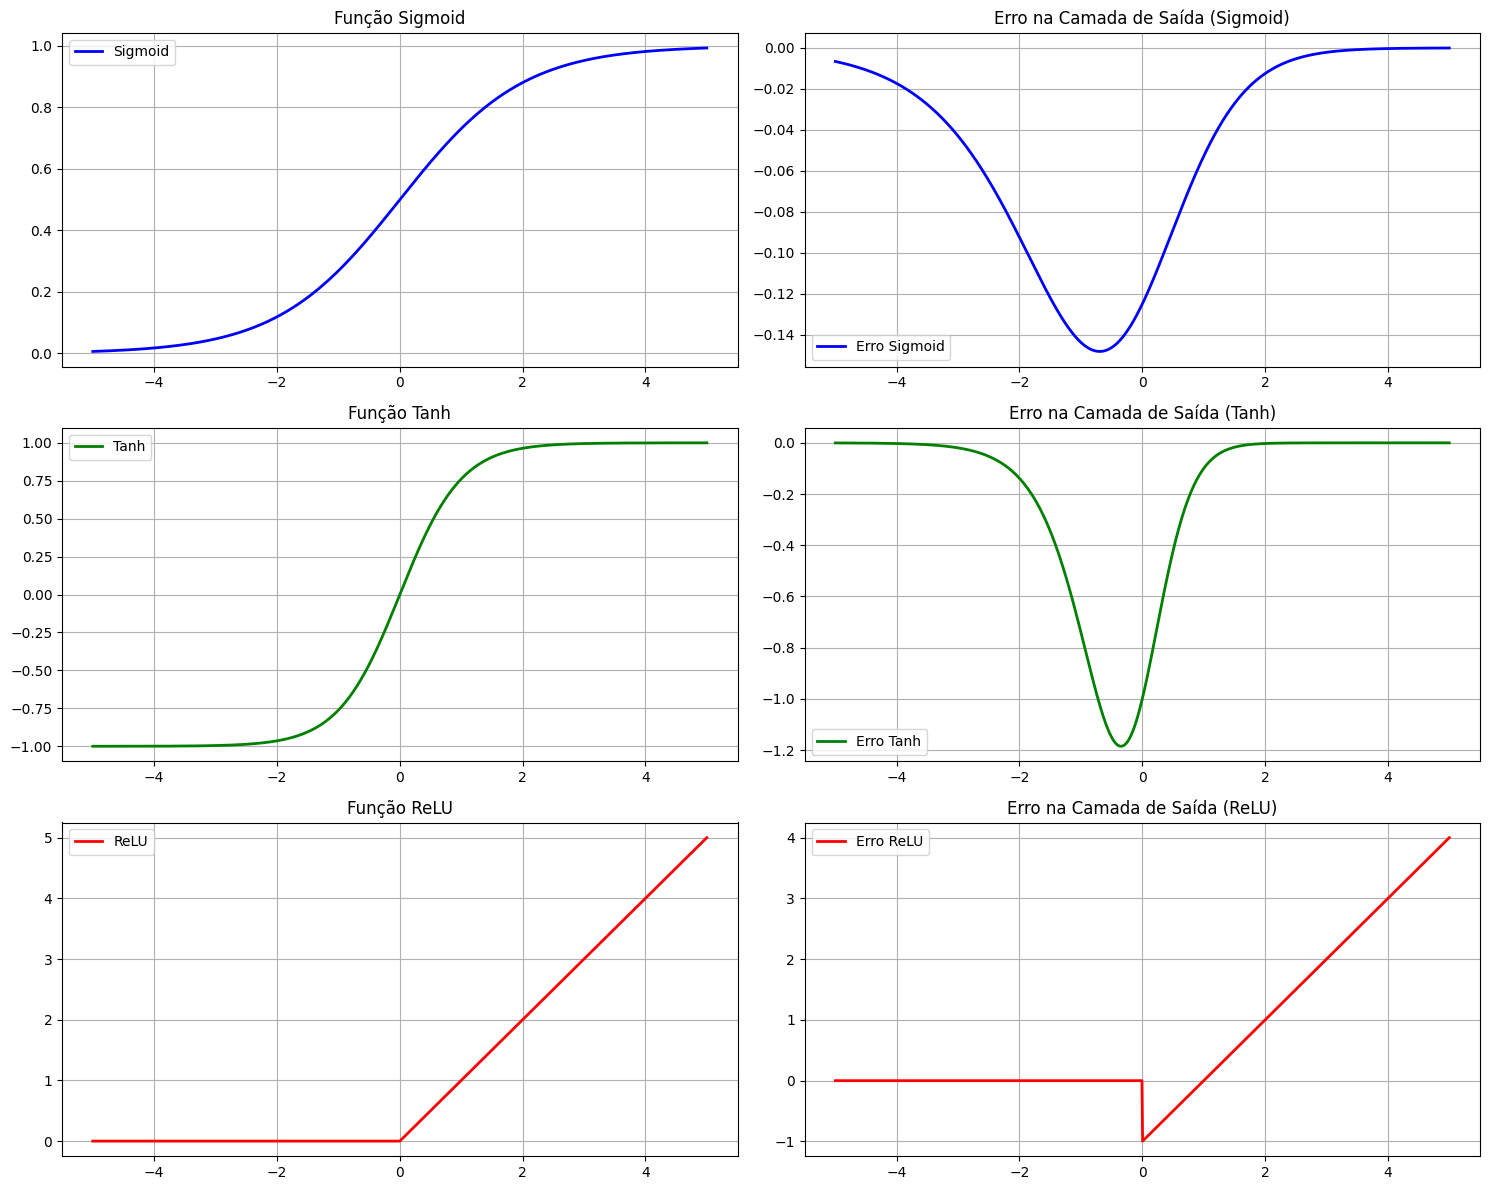

In [3]:
# Visualização do erro na camada de saída para diferentes funções de ativação
def plot_output_error():
    # Criar dados para o gráfico
    z = np.linspace(-5, 5, 1000)
    
    # Calcular as funções de ativação e suas derivadas
    sigmoid = 1.0 / (1.0 + np.exp(-z))
    sigmoid_derivative = sigmoid * (1 - sigmoid)
    
    tanh = np.tanh(z)
    tanh_derivative = 1 - tanh**2
    
    relu = np.maximum(0, z)
    relu_derivative = np.where(z > 0, 1, 0)
    
    # Calcular o erro para um exemplo onde y = 1
    y = 1.0
    
    error_sigmoid = (sigmoid - y) * sigmoid_derivative
    error_tanh = (tanh - y) * tanh_derivative
    error_relu = (relu - y) * relu_derivative
    
    # Criar a figura
    fig, axs = plt.subplots(3, 2, figsize=(15, 12))
    
    # Plotar as funções de ativação
    axs[0, 0].plot(z, sigmoid, 'b-', linewidth=2, label='Sigmoid')
    axs[0, 0].set_title('Função Sigmoid')
    axs[0, 0].grid(True)
    axs[0, 0].legend()
    
    axs[1, 0].plot(z, tanh, 'g-', linewidth=2, label='Tanh')
    axs[1, 0].set_title('Função Tanh')
    axs[1, 0].grid(True)
    axs[1, 0].legend()
    
    axs[2, 0].plot(z, relu, 'r-', linewidth=2, label='ReLU')
    axs[2, 0].set_title('Função ReLU')
    axs[2, 0].grid(True)
    axs[2, 0].legend()
    
    # Plotar os erros
    axs[0, 1].plot(z, error_sigmoid, 'b-', linewidth=2, label='Erro Sigmoid')
    axs[0, 1].set_title('Erro na Camada de Saída (Sigmoid)')
    axs[0, 1].grid(True)
    axs[0, 1].legend()
    
    axs[1, 1].plot(z, error_tanh, 'g-', linewidth=2, label='Erro Tanh')
    axs[1, 1].set_title('Erro na Camada de Saída (Tanh)')
    axs[1, 1].grid(True)
    axs[1, 1].legend()
    
    axs[2, 1].plot(z, error_relu, 'r-', linewidth=2, label='Erro ReLU')
    axs[2, 1].set_title('Erro na Camada de Saída (ReLU)')
    axs[2, 1].grid(True)
    axs[2, 1].legend()
    
    # Ajustar o layout
    plt.tight_layout()
    plt.show()

plot_output_error()

### Erro na Camada de Saída para Diferentes Funções de Erro

Além da função de erro quadrático médio, outras funções de erro podem ser utilizadas, especialmente em problemas de classificação. Vamos examinar o caso da entropia cruzada (cross-entropy).

#### Entropia Cruzada para Classificação Binária

Para classificação binária, a função de entropia cruzada é definida como:

$E = -[y \log(a) + (1-y) \log(1-a)]$

Onde:
- $y$ é o valor desejado (0 ou 1)
- $a$ é a ativação do neurônio de saída

A derivada desta função em relação à ativação é:

$\frac{\partial E}{\partial a} = -\frac{y}{a} + \frac{1-y}{1-a}$

Quando combinada com a função sigmoid, obtemos uma simplificação notável:

$\delta^L = a - y$

Esta simplificação ocorre porque a derivada da função sigmoid cancela parte da expressão da derivada da entropia cruzada, resultando em uma fórmula muito mais simples para o erro na camada de saída.

In [4]:
# Demonstração simbólica da derivação do erro com entropia cruzada
def demonstrate_cross_entropy_error():
    """
    Esta função demonstra matematicamente como calcular:
    1. A derivada da função de custo de entropia cruzada binária
    2. Aplicando a regra da cadeia com a função sigmoid
    3. Obtendo a expressão final do erro (delta) para backpropagation
    """
    
    # Definir símbolos matemáticos para cálculo simbólico
    # y: rótulo verdadeiro (0 ou 1)
    # a: saída ativada da rede (valor entre 0 e 1)
    # z: entrada ponderada do neurônio (antes da ativação)
    y, a, z = sp.symbols('y a z')
    
    # 1. Definir a função de custo de entropia cruzada binária
    # Fórmula: E = -[y*log(a) + (1-y)*log(1-a)]
    E = -(y * sp.log(a) + (1 - y) * sp.log(1 - a))
    
    # 2. Calcular a derivada parcial do erro em relação à ativação (dE/da)
    dE_da = sp.diff(E, a)
    dE_da_simplified = sp.simplify(dE_da)  # Simplifica a expressão
    
    # 3. Definir a função sigmoid e sua derivada
    sigmoid = 1 / (1 + sp.exp(-z))  # σ(z) = 1/(1+e^-z)
    dsigmoid_dz = sigmoid * (1 - sigmoid)  # σ'(z) = σ(z)*(1-σ(z))
    
    # 4. Substituir a = σ(z) na expressão da derivada do erro
    # Isso conecta o erro à entrada z através da ativação
    dE_da_with_sigmoid = dE_da_simplified.subs(a, sigmoid)
    
    # 5. Calcular o erro delta usando a regra da cadeia:
    # δ = dE/dz = (dE/da) * (da/dz)
    delta = dE_da_with_sigmoid * dsigmoid_dz
    
    # 6. Simplificar a expressão final (resultado esperado: a - y)
    delta_simplified = sp.simplify(delta)
    
    # Exibir os resultados passo a passo usando LaTeX
    print("Passo 1: Função de Custo")
    display(Math("E = -[y \\log(a) + (1-y) \\log(1-a)]"))
    
    print("\nPasso 2: Derivada do Erro em relação à Ativação")
    display(Math("\\frac{\\partial E}{\\partial a} = " + sp.latex(dE_da_simplified)))
    
    print("\nPasso 3: Função Sigmoid e sua Derivada")
    display(Math("a = \\sigma(z) = \\frac{1}{1 + e^{-z}}"))
    display(Math("\\frac{\\partial a}{\\partial z} = \\sigma'(z) = \\sigma(z) \\cdot (1 - \\sigma(z))"))
    
    print("\nPasso 4: Resultado Final (Simplificado)")
    display(Math("\\delta = \\frac{\\partial E}{\\partial z} = \\frac{\\partial E}{\\partial a} \\cdot \\frac{\\partial a}{\\partial z} = a - y"))

# Executar a demonstração
demonstrate_cross_entropy_error()

Passo 1: Função de Custo


<IPython.core.display.Math object>


Passo 2: Derivada do Erro em relação à Ativação


<IPython.core.display.Math object>


Passo 3: Função Sigmoid e sua Derivada


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Passo 4: Resultado Final (Simplificado)


<IPython.core.display.Math object>

### Implementação do Cálculo do Erro na Camada de Saída

In [5]:
# Implementação do cálculo do erro na camada de saída
def sigmoid(z):
    """Função de ativação sigmoid"""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(z):
    """Derivada da função sigmoid"""
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    """Função de ativação tanh"""
    return np.tanh(z)

def tanh_derivative(z):
    """Derivada da função tanh"""
    return 1 - tanh(z)**2

def relu(z):
    """Função de ativação ReLU"""
    return np.maximum(0, z)

def relu_derivative(z):
    """Derivada da função ReLU"""
    return np.where(z > 0, 1, 0)

def output_error_mse(y, a, z, activation_function='sigmoid'):
    """Calcula o erro na camada de saída usando MSE
    
    Args:
        y: Valor desejado
        a: Ativação (saída) do neurônio
        z: Soma ponderada das entradas
        activation_function: Função de ativação ('sigmoid', 'tanh', 'relu')
        
    Returns:
        delta: Erro na camada de saída
    """
    if activation_function == 'sigmoid':
        return (a - y) * sigmoid_derivative(z)
    elif activation_function == 'tanh':
        return (a - y) * tanh_derivative(z)
    elif activation_function == 'relu':
        return (a - y) * relu_derivative(z)
    else:
        raise ValueError(f"Função de ativação '{activation_function}' não suportada")

def output_error_cross_entropy(y, a, z, activation_function='sigmoid'):
    """Calcula o erro na camada de saída usando entropia cruzada
    
    Args:
        y: Valor desejado
        a: Ativação (saída) do neurônio
        z: Soma ponderada das entradas
        activation_function: Função de ativação ('sigmoid')
        
    Returns:
        delta: Erro na camada de saída
    """
    if activation_function == 'sigmoid':
        return a - y  # Fórmula simplificada para sigmoid + cross-entropy
    else:
        raise ValueError(f"Combinação de entropia cruzada com '{activation_function}' não implementada")

# Exemplo de uso
z_values = np.linspace(-5, 5, 10)
y_value = 1.0


print("Erro na camada de saída usando MSE:")
for z_val in z_values:
    a_val = sigmoid(z_val)
    error_sigmoid = output_error_mse(y_value, a_val, z_val, 'sigmoid')
    error_tanh = output_error_mse(y_value, tanh(z_val), z_val, 'tanh')
    error_relu = output_error_mse(y_value, relu(z_val), z_val, 'relu')
    
    # Formato da saída:
    # z = valor_z | a_sigmoid = valor_ativacao | erro_sigmoid = valor_erro | erro_tanh = valor_erro | erro_relu = valor_erro
    print(f"z = {z_val:.2f}, a_sigmoid = {a_val:.4f}, erro_sigmoid = {error_sigmoid:.4f}, "
          f"erro_tanh = {error_tanh:.4f}, erro_relu = {error_relu:.4f}")


print("""
Erro na camada de saída usando MSE:

# Quando z é negativo grande (ex: -5.00):
# - A ativação sigmoid é próxima de 0
# - O erro é pequeno porque f'(z) ≈ 0 (vanishing gradient)
z = -5.00, a_sigmoid = 0.0067, erro_sigmoid = -0.0066, erro_tanh = -0.0001, erro_relu = 0.0000

# Quando z = 0 (ponto central):
# - Sigmoid ativa em 0.5 (máxima incerteza)
# - Erros são significativos para todas funções
z = 0.00, a_sigmoid = 0.5000, erro_sigmoid = -0.2500, erro_tanh = -0.5000, erro_relu = -0.5000

# Quando z é positivo grande (ex: 5.00):
# - Sigmoid satura perto de 1
# - Erro pequeno novamente (f'(z) ≈ 0)
z = 5.00, a_sigmoid = 0.9933, erro_sigmoid = -0.0066, erro_tanh = -0.0066, erro_relu = -0.9933
""")


print("\nErro na camada de saída usando Entropia Cruzada:")
for z_val in z_values:
    a_val = sigmoid(z_val)
    error_cross_entropy = output_error_cross_entropy(y_value, a_val, z_val)
    
    # Formato da saída:
    # z = valor_z | a = valor_ativacao | erro = valor_erro
    print(f"z = {z_val:.2f}, a = {a_val:.4f}, erro = {error_cross_entropy:.4f}")


print("""
Erro na camada de saída usando Entropia Cruzada:

# Para entropia cruzada + sigmoid, o erro é simplesmente (a - y)
# Note como o erro escala linearmente, sem os problemas de vanishing gradient

# z muito negativo:
# - Erro ≈ -1 (pois a ≈ 0 e y = 1)
z = -5.00, a = 0.0067, erro = -0.9933

# z = 0:
# - Erro = -0.5 (a = 0.5, y = 1)
z = 0.00, a = 0.5000, erro = -0.5000

# z muito positivo:
# - Erro ≈ 0 (pois a ≈ 1 e y = 1)
z = 5.00, a = 0.9933, erro = -0.0067
""")


Erro na camada de saída usando MSE:
z = -5.00, a_sigmoid = 0.0067, erro_sigmoid = -0.0066, erro_tanh = -0.0004, erro_relu = -0.0000
z = -3.89, a_sigmoid = 0.0201, erro_sigmoid = -0.0193, erro_tanh = -0.0033, erro_relu = -0.0000
z = -2.78, a_sigmoid = 0.0585, erro_sigmoid = -0.0519, erro_tanh = -0.0306, erro_relu = -0.0000
z = -1.67, a_sigmoid = 0.1589, erro_sigmoid = -0.1124, erro_tanh = -0.2569, erro_relu = -0.0000
z = -0.56, a_sigmoid = 0.3646, erro_sigmoid = -0.1472, erro_tanh = -1.1214, erro_relu = -0.0000
z = 0.56, a_sigmoid = 0.6354, erro_sigmoid = -0.0845, erro_tanh = -0.3692, erro_relu = -0.4444
z = 1.67, a_sigmoid = 0.8411, erro_sigmoid = -0.0212, erro_tanh = -0.0092, erro_relu = 0.6667
z = 2.78, a_sigmoid = 0.9415, erro_sigmoid = -0.0032, erro_tanh = -0.0001, erro_relu = 1.7778
z = 3.89, a_sigmoid = 0.9799, erro_sigmoid = -0.0004, erro_tanh = -0.0000, erro_relu = 2.8889
z = 5.00, a_sigmoid = 0.9933, erro_sigmoid = -0.0000, erro_tanh = -0.0000, erro_relu = 4.0000

Erro na cama

## Resumo


1. O erro na camada de saída é calculado como a derivada do erro total em relação à soma ponderada das entradas.
2. Para o erro quadrático médio (MSE) e a função sigmoid, o erro é $(a - y) \cdot a \cdot (1 - a)$.
3. Para a entropia cruzada e a função sigmoid, o erro simplifica-se para $a - y$.
4. A escolha da função de erro e da função de ativação afeta significativamente o cálculo do erro e, consequentemente, o processo de aprendizado da rede.
